# 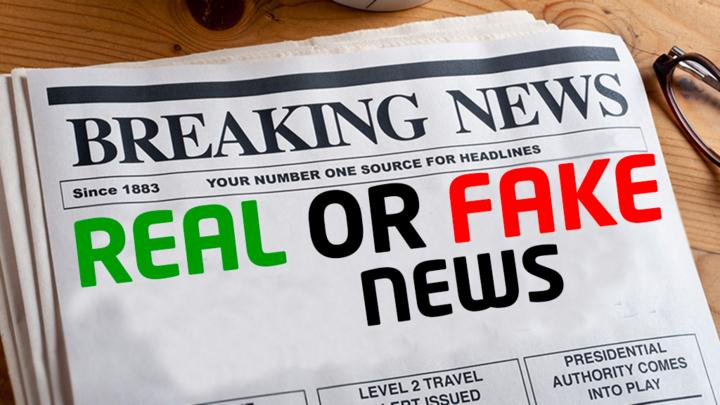



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing the necesarry Libraries

Here I am going to importing some of the required library, if extra library is required to install It will be install later on.

In [ ]:
import numpy as np
import pandas as pd
import csv
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re
from sklearn.model_selection import GridSearchCV

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Reading the Dataset and checking the null values and distribution of the target coulmn

In [ ]:
news=pd.read_csv('/content/drive/MyDrive/news.csv')
news.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
news

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [ ]:
news.isnull().sum()

,0
title,0
text,0
label,0


<Axes: xlabel='label', ylabel='count'>

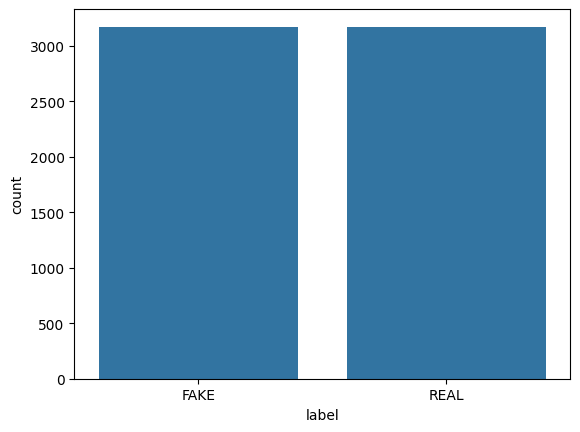

In [ ]:
sns.countplot(x='label',data=news)

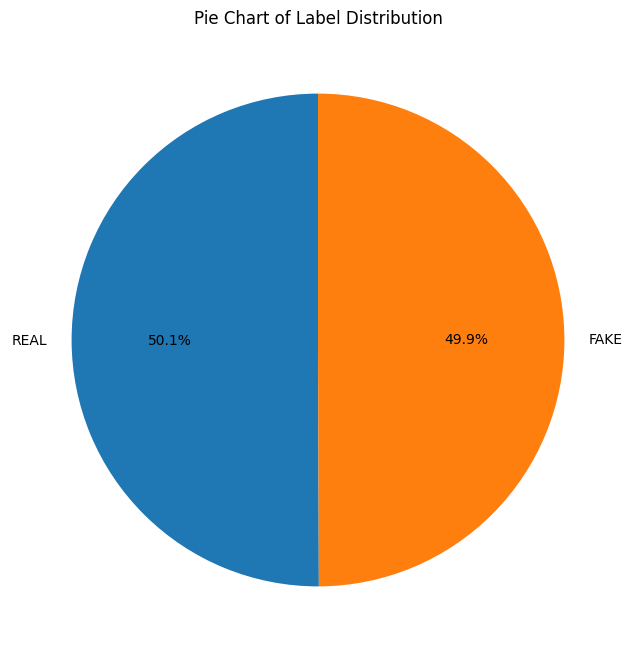

In [ ]:
import matplotlib.pyplot as plt


label_counts = news['label'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Label Distribution')
plt.show()

# Data Cleaning Part

In [ ]:
# Define stopwords
stop_words = set(stopwords.words('english'))
# Function to preprocess and tokenize text
def preprocess_and_tokenize(text):
    # Lowercase, tokenize, filter stopwords and non-alphabetic words
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

news['text'].apply(lambda x: " ".join(preprocess_and_tokenize(x)))

# Aggregate texts by label and preprocess
real_texts = " ".join(news[news['label'] == 'REAL']['text'])
fake_texts = " ".join(news[news['label'] == 'FAKE']['text'])

# Count most common words
real_word_counts = Counter(real_texts.split()).most_common(20)
fake_word_counts = Counter(fake_texts.split()).most_common(20)

# Create DataFrames for easy visualization/manipulation
real_words_df = pd.DataFrame(real_word_counts, columns=['Word (REAL)', 'Frequency'])
fake_words_df = pd.DataFrame(fake_word_counts, columns=['Word (FAKE)', 'Frequency'])

# Optionally, you can print or return these DataFrames
print(real_words_df)
print(fake_words_df)


   Word (REAL)  Frequency
0          the     143771
1           to      78281
2           of      68271
3            a      62286
4          and      59850
5           in      52541
6         that      36925
7           is      26065
8          for      25380
9           on      22946
10        with      16650
11          he      16593
12          as      16406
13         was      15665
14         his      15196
15         The      14507
16        have      13404
17         has      13133
18          be      12630
19         are      12417
   Word (FAKE)  Frequency
0          the     114516
1           of      60050
2           to      58445
3          and      51569
4            a      40215
5           in      35978
6         that      27347
7           is      25886
8          for      18092
9           on      14678
10         The      12690
11        with      12646
12          as      12565
13         are      12165
14          by      11186
15          be      11171
16         w

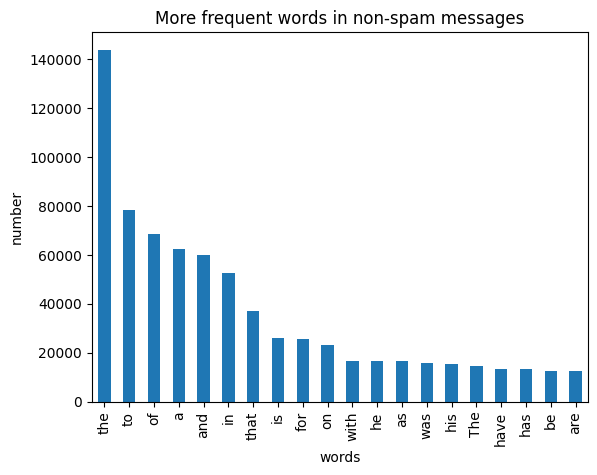

In [ ]:
real_words_df.plot.bar(legend=False)
y_pos=np.arange(len(real_words_df['Frequency']))
plt.xticks(y_pos, real_words_df["Word (REAL)"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

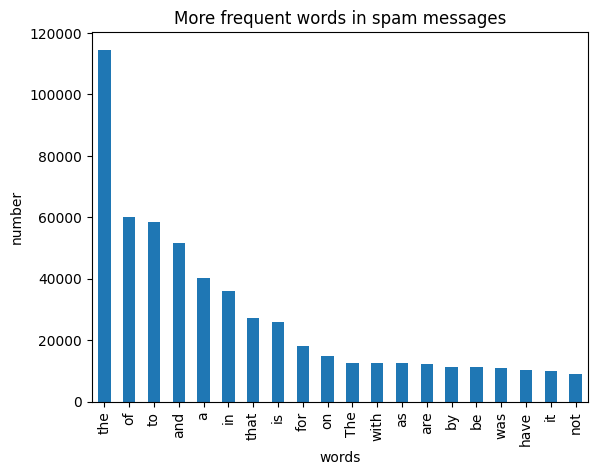

In [ ]:
fake_words_df.plot.bar(legend=False)
y_pos=np.arange(len(fake_words_df['Frequency']))
plt.xticks(y_pos, fake_words_df["Word (FAKE)"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [ ]:
import string
def clean_token(text):
    text=text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
news['text']=news['text'].apply(lambda x:clean_token(x))

In [ ]:
news['text']

,text
0,daniel greenfield a shillman journalism fello...
1,google pinterest digg linkedin reddit stumbleu...
2,u s secretary of state john f kerry said mon...
3,kaydee king kaydeeking november the le...
4,it s primary day in new york and front runners...
...,...
6330,the state department told the republican natio...
6331,the p in pbs should stand for plutocratic ...
6332,anti trump protesters are tools of the oligar...
6333,addis ababa ethiopia president obama convene...


## Train-Test Split for training the Ml algorithms

In [ ]:
x=news['text']
y=news['label']

In [ ]:
x

,text
0,daniel greenfield a shillman journalism fello...
1,google pinterest digg linkedin reddit stumbleu...
2,u s secretary of state john f kerry said mon...
3,kaydee king kaydeeking november the le...
4,it s primary day in new york and front runners...
...,...
6330,the state department told the republican natio...
6331,the p in pbs should stand for plutocratic ...
6332,anti trump protesters are tools of the oligar...
6333,addis ababa ethiopia president obama convene...


In [ ]:
y

,label
0,FAKE
1,FAKE
2,REAL
3,FAKE
4,REAL
...,...
6330,REAL
6331,FAKE
6332,FAKE
6333,REAL


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#One Hot Encoding (Bag of Words) Method :

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Convert the text to a bag-of-words representation
vectorizer = CountVectorizer()
X_train_onehot = vectorizer.fit_transform(X_train)
X_test_onehot = vectorizer.transform(X_test)

In [ ]:
X_train_onehot.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_train=y_train.map(lambda x:1 if x=='REAL' else 0)
y_test=y_test.map(lambda x:1 if x=='REAL' else 0)

In [ ]:
y_train

,label
1142,1
2654,0
5395,0
1170,0
4371,0
...,...
3772,1
5191,0
5226,0
5390,1


# Machine Learning Models using Bag of Words

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train_onehot,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred_lr=LR.predict(X_test_onehot)
# Evaluate the accuracy of the classifier
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", lr_accuracy)

Accuracy: 0.920284135753749


In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       628
           1       0.92      0.92      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_onehot,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt=dt.predict(X_test_onehot)
# Evaluate the accuracy of the classifier
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", dt_accuracy)

Accuracy: 0.797947908445146


In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       628
           1       0.80      0.80      0.80       639

    accuracy                           0.80      1267
   macro avg       0.80      0.80      0.80      1267
weighted avg       0.80      0.80      0.80      1267



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(X_train_onehot,y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
y_pred_gbc=GBC.predict(X_test_onehot)
# Evaluate the accuracy of the classifier
Gb_accuracy = accuracy_score(y_test, y_pred_gbc)
print("Accuracy:", Gb_accuracy)

Accuracy: 0.8887134964483031


In [ ]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       628
           1       0.90      0.88      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train_onehot,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_rfc=RFC.predict(X_test_onehot)
# Evaluate the accuracy of the classifier
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", rfc_accuracy)

Accuracy: 0.8966061562746646


In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       628
           1       0.91      0.89      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_train_onehot, y_train)

# Predict on the test set
nb_pred = nb_model.predict(X_test_onehot)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Model accuracy: {nb_accuracy * 100:.2f}%")

Model accuracy: 89.90%


In [ ]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       628
           1       0.88      0.93      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



In [ ]:
from sklearn.svm import SVC
# Train the model
svc_model = SVC()
svc_model.fit(X_train_onehot, y_train)

# Predict on the test set
svm_pred = svc_model.predict(X_test_onehot)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"Model accuracy: {svm_accuracy * 100:.2f}%")

Model accuracy: 85.32%


In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       628
           1       0.92      0.78      0.84       639

    accuracy                           0.85      1267
   macro avg       0.86      0.85      0.85      1267
weighted avg       0.86      0.85      0.85      1267



In [ ]:
accuracy_df=pd.DataFrame(data=[('Logistic Regression',lr_accuracy),('Decision Tree',dt_accuracy),('GradientBoosting',Gb_accuracy),('RandomForest',rfc_accuracy),('SVM',svm_accuracy)])

In [ ]:
accuracy_df.columns=['Model','Accuracy']

# TF-IDF Encoding Method

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Convert the text to a bag-of-words representation
tf_vectorizer = TfidfVectorizer(max_df=0.7)
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [ ]:
y_train=y_train.map(lambda x:1 if x=='REAL' else 0)
y_test=y_test.map(lambda x:1 if x=='REAL' else 0)

# Machine Learning Models using TF-IDF

In [ ]:
LR_tf= LogisticRegression()
LR_tf.fit(X_train_tf,y_train)

LogisticRegression()

In [ ]:
y_pred_lrtf=LR_tf.predict(X_test_tf)
# Evaluate the accuracy of the classifier
lr_tf_accuracy = accuracy_score(y_test, y_pred_lrtf)
print("Accuracy:", lr_tf_accuracy)

Accuracy: 0.9131807419100236


In [ ]:
print(classification_report(y_test,y_pred_lrtf))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       628
           1       0.93      0.90      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



In [ ]:
Dt_tf=DecisionTreeClassifier()
Dt_tf.fit(X_train_tf,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dttf=Dt_tf.predict(X_test_tf)
# Evaluate the accuracy of the classifier
dt_tf_accuracy = accuracy_score(y_test, y_pred_dttf)
print("Accuracy:", dt_tf_accuracy)

Accuracy: 0.8184688239936859


In [ ]:
print(classification_report(y_test,y_pred_dttf))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       628
           1       0.81      0.84      0.82       639

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267



In [ ]:
GBC_tf= GradientBoostingClassifier(random_state=0)
GBC_tf.fit(X_train_tf,y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
y_pred_GBtf=GBC_tf.predict(X_test_tf)
# Evaluate the accuracy of the classifier
GB_tf_accuracy = accuracy_score(y_test, y_pred_GBtf)
print("Accuracy:", GB_tf_accuracy)

Accuracy: 0.8910812943962115


In [ ]:
print(classification_report(y_test,y_pred_GBtf))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       628
           1       0.91      0.87      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



In [ ]:
RFC_tf= RandomForestClassifier(random_state=0)
RFC_tf.fit(X_train_tf,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_rfctf=RFC_tf.predict(X_test_tf)
# Evaluate the accuracy of the classifier
rfc_tf_accuracy = accuracy_score(y_test, y_pred_rfctf)
print("Accuracy:", rfc_tf_accuracy)

Accuracy: 0.8871349644830308


In [ ]:
print(classification_report(y_test,y_pred_rfctf))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       628
           1       0.90      0.88      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



In [ ]:
# Train the model
nb_tf_model = MultinomialNB()
nb_tf_model.fit(X_train_tf, y_train)

# Predict on the test set
nb_tf_pred = nb_tf_model.predict(X_test_tf)

# Calculate accuracy
nb_tf_accuracy = accuracy_score(y_test, nb_tf_pred)
print(f"Model accuracy: {nb_tf_accuracy * 100:.2f}%")

Model accuracy: 83.11%


In [ ]:
print(classification_report(y_test,nb_tf_pred))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80       628
           1       0.76      0.98      0.85       639

    accuracy                           0.83      1267
   macro avg       0.87      0.83      0.83      1267
weighted avg       0.87      0.83      0.83      1267



In [ ]:
# Train the model
svc_tf_model= SVC()
svc_tf_model.fit(X_train_tf, y_train)

# Predict on the test set
svm_tf_pred_ = svc_tf_model.predict(X_test_tf)

# Calculate accuracy
svm_tf_accuracy = accuracy_score(y_test, svm_tf_pred_)
print(f"Model accuracy: {svm_tf_accuracy * 100:.2f}%")

Model accuracy: 93.29%


In [ ]:
print(classification_report(y_test,svm_tf_pred_))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       628
           1       0.95      0.91      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [ ]:
accuracy_df_tfidf=pd.DataFrame(data=[('Logistic Regression',lr_tf_accuracy),('Decision Tree',dt_tf_accuracy),('GradientBoosting',GB_tf_accuracy),('RandomForest',rfc_tf_accuracy),('SVM',svm_tf_accuracy)])

In [ ]:
#bag of words encoding
accuracy_df
accuracy_df.columns=['Model','Accuracy']

In [ ]:
accuracy_df

,Model,Accuracy
0,Logistic Regression,0.920284
1,Decision Tree,0.797948
2,GradientBoosting,0.888713
3,RandomForest,0.896606
4,SVM,0.853197


In [ ]:
#TF-IDF encoding
accuracy_df_tfidf.columns=['Model','Accuracy']
accuracy_df_tfidf

,Model,Accuracy
0,Logistic Regression,0.913181
1,Decision Tree,0.818469
2,GradientBoosting,0.891081
3,RandomForest,0.887135
4,SVM,0.932912


# Word2Vec Models

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
X_train_tokenized=X_train.apply(word_tokenize)
X_test_tokenized=X_test.apply(word_tokenize)

In [ ]:
# Convert the tokenized data to a list
X_train_tokenized_list = X_train_tokenized.tolist()
X_test_tokenized_list = X_test_tokenized.tolist()

In [ ]:
from gensim.models import Word2Vec

In [ ]:
word2vec_model=Word2Vec(sentences=X_train_tokenized,vector_size=100,workers=4,window=5,min_count=1,sg=1)

In [ ]:
# Save the model (optional)
word2vec_model.save("word2vec_fakenews_model.bin")

In [ ]:
def get_sentence_vector(tokens,model):

  #Get vectors for words in the sentence that are in model's vocabulary
  vectorized_words=[model.wv[word] for word in tokens if word in model.wv]
  if len(vectorized_words)>0:
    return np.mean(vectorized_words,axis=0) #Averaging the word vecotrs to get a sentence vector
  else:
    return np.zeros(model.vector_size)

In [ ]:
# Get sentence vectors for the training and test sets
X_train_vectors = np.array([get_sentence_vector(tokens, word2vec_model) for tokens in X_train_tokenized_list])
X_test_vectors = np.array([get_sentence_vector(tokens, word2vec_model) for tokens in X_test_tokenized_list])


In [ ]:
X_train_vectors.shape

(5068, 100)

In [ ]:
# Train the classifier on the Word2Vec embeddings
clf_w2vec = LogisticRegression()
clf_w2vec.fit(X_train_vectors, y_train)

# Predict on the test data
lr_pred_w2vec = clf_w2vec.predict(X_test_vectors)

lr_w2vec_accuracy = accuracy_score(y_test, lr_pred_w2vec)
print(f"Model accuracy: {lr_w2vec_accuracy * 100:.2f}%")

Model accuracy: 88.24%


In [ ]:
print(classification_report(y_test,lr_pred_w2vec))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       628
           1       0.88      0.89      0.88       639

    accuracy                           0.88      1267
   macro avg       0.88      0.88      0.88      1267
weighted avg       0.88      0.88      0.88      1267



In [ ]:
dt_w2vec=DecisionTreeClassifier()
dt_w2vec.fit(X_train_vectors,y_train)

# Predict on the test data
dt_pred_w2vec = dt_w2vec.predict(X_test_vectors)

dt_w2vec_accuracy = accuracy_score(y_test, dt_pred_w2vec)
print(f"Model accuracy: {dt_w2vec_accuracy * 100:.2f}%")

Model accuracy: 81.14%


In [ ]:
print(classification_report(y_test,dt_pred_w2vec))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       628
           1       0.81      0.82      0.81       639

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267



In [ ]:
GB_w2vec=GradientBoostingClassifier()
GB_w2vec.fit(X_train_vectors,y_train)

# Predict on the test data
GB_pred_w2vec = GB_w2vec.predict(X_test_vectors)

GB_w2vec_accuracy = accuracy_score(y_test, GB_pred_w2vec)
print(f"Model accuracy: {GB_w2vec_accuracy * 100:.2f}%")

Model accuracy: 89.03%


In [ ]:
print(classification_report(y_test,GB_pred_w2vec))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       628
           1       0.88      0.90      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



In [ ]:
rf_w2vec=RandomForestClassifier()
rf_w2vec.fit(X_train_vectors,y_train)

# Predict on the test data
rf_pred_w2vec = rf_w2vec.predict(X_test_vectors)

rf_w2vec_accuracy = accuracy_score(y_test, rf_pred_w2vec)
print(f"Model accuracy: {rf_w2vec_accuracy * 100:.2f}%")

Model accuracy: 88.48%


In [ ]:
print(classification_report(y_test,rf_pred_w2vec))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       628
           1       0.89      0.88      0.89       639

    accuracy                           0.88      1267
   macro avg       0.88      0.88      0.88      1267
weighted avg       0.88      0.88      0.88      1267



In [ ]:
# Train the model
svc_w2vec_model= SVC()
svc_w2vec_model.fit(X_train_vectors,y_train)

# Predict on the test set
svm_pred_w2vec = svc_w2vec_model.predict(X_test_vectors)

# Calculate accuracy
svm_w2vec_accuracy = accuracy_score(y_test,svm_pred_w2vec)
print(f"Model accuracy: {svm_w2vec_accuracy * 100:.2f}%")

Model accuracy: 88.79%


In [ ]:
print(classification_report(y_test,svm_pred_w2vec))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       628
           1       0.88      0.90      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



In [ ]:
accuracy_df_w2vec=pd.DataFrame(data=[('Logistic Regression',lr_w2vec_accuracy),('Decision Tree',dt_w2vec_accuracy),('GradientBoosting',GB_w2vec_accuracy),('RandomForest',rf_w2vec_accuracy),('SVM',svm_w2vec_accuracy)])

In [ ]:
accuracy_df_w2vec.columns=['Model','Accuracy']
accuracy_df_w2vec

,Model,Accuracy
0,Logistic Regression,0.882399
1,Decision Tree,0.811365
2,GradientBoosting,0.890292
3,RandomForest,0.884767
4,SVM,0.887924


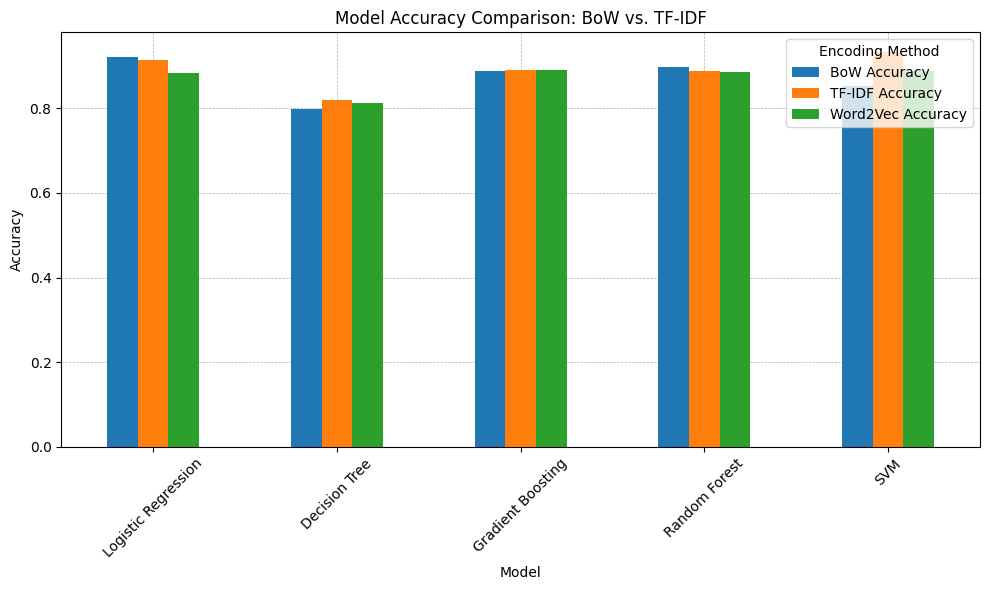

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest','SVM']
bow_accuracies=accuracy_df['Accuracy']
tfidf_accuracies=accuracy_df_tfidf['Accuracy']
w2vec_accuracies=accuracy_df_w2vec['Accuracy']

df = pd.DataFrame({
    'Model': models,
    'BoW Accuracy': bow_accuracies,
    'TF-IDF Accuracy': tfidf_accuracies,
    'Word2Vec Accuracy':w2vec_accuracies
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
df.set_index('Model').plot(kind='bar', ax=ax)
ax.set_title('Model Accuracy Comparison: BoW vs. TF-IDF')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.grid(True, which='both', linestyle='--', linewidth='0.5')
ax.set_axisbelow(True)

plt.xticks(rotation=45)
plt.legend(title='Encoding Method')
plt.tight_layout()
plt.show()

Reasons for Choosing Random Forest with Word2Vec Over BoW and TF-IDF:
- Random Forest with Word2Vec shows the highest overall accuracy at 90%, combined with balanced precision, recall, and F1-score across both classes, making it the most robust model.

- Word2Vec captures semantic relationships between words, providing better feature representations for this classification task compared to simple frequency-based methods like Bag of Words or TF-IDF.

- Consistently higher performance across multiple models—While BoW and TF-IDF show strong performance, most models (especially Random Forest and Gradient Boosting) perform slightly better with Word2Vec.

- Better generalization: Models like Logistic Regression and Random Forest perform comparably well across all encodings, but Word2Vec ensures more flexibility in understanding the context, leading to more reliable predictions.



# Optimizing ML Algorithms

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold,RandomizedSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomizedSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],  # Number of trees
    'max_depth': [10, 20, 30, 40, None],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples at a leaf node
    'bootstrap': [True, False]                   # Whether bootstrap samples are used
}


# Set up RandomizedSearchCV with the Random Forest model and the parameter grid
rf_random_search = RandomizedSearchCV(estimator=rf_w2vec, param_distributions=rf_param_grid,
                                      n_iter=50, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit RandomizedSearchCV to the data
rf_random_search.fit(X_train_vectors, y_train)

# Get the best parameters and best score
print(f"Best parameters for Random Forest: {rf_random_search.best_params_}")
print(f"Best accuracy from RandomizedSearchCV: {rf_random_search.best_score_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Best accuracy from RandomizedSearchCV: 0.8958215778703288


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'kernel': ['linear', 'rbf'],   # Linear or Radial Basis Function kernel
    'gamma': ['scale', 'auto'],    # Kernel coefficient for RBF
}


# Set up RandomizedSearchCV
svm_random_search = RandomizedSearchCV(estimator=svc_w2vec_model, param_distributions=svm_param_grid,
                                       n_iter=10, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit RandomizedSearchCV
svm_random_search.fit(X_train_vectors, y_train)

# Best parameters and score for SVM
print(f"Best parameters for SVM: {svm_random_search.best_params_}")
print(f"Best accuracy for SVM: {svm_random_search.best_score_}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for SVM: {'kernel': 'linear', 'gamma': 'auto', 'C': 100}
Best accuracy for SVM: 0.8950316496979115


In [ ]:
# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 300, 500],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],           # Maximum depth of the trees
    'min_samples_split': [2, 4, 6],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at a leaf node
}

# Initialize Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Set up RandomizedSearchCV
gb_random_search = RandomizedSearchCV(estimator=GB_w2vec, param_distributions=gb_param_grid,
                                      n_iter=10, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit RandomizedSearchCV
gb_random_search.fit(X_train_vectors, y_train)

# Best parameters and score for Gradient Boosting
print(f"Best parameters for Gradient Boosting: {gb_random_search.best_params_}")
print(f"Best accuracy for Gradient Boosting: {gb_random_search.best_score_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Gradient Boosting: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
Best accuracy for Gradient Boosting: 0.9019365604148047


# Data Preparation for RNN , LSTM model


In [ ]:
# 1. Split the data into Train, Validation, and Test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2 for validation

In [ ]:
X_train

,text
1526,by jason easley on tue nov at pm the mor...
2279,some people believe that kentucky or even all ...
6233,email north korea s foreign ministry slammed ...
3816,an obama veteran who s been on a campaign th...
856,united states reformation or fracture by t...
...,...
1217,conservatives are dismayed about the supreme c...
6305,print san francisco quarterback colin kaep...
2989,in today s wikileaks release of hacked pod...
1301,subscribe my daughter and me yesterday was na...


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 2. Tokenization and Padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding the sequences
max_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

# Labels encoding (Assuming binary classification)
y_train_encoded = y_train.map({'REAL': 1, 'FAKE': 0}).values
y_val_encoded = y_val.map({'REAL': 1, 'FAKE': 0}).values
y_test_encoded = y_test.map({'REAL': 1, 'FAKE': 0}).values


In [ ]:
y_train_encoded

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!echo '{"username":"sashankvasireddy","key":"9d6c8f9a8593d8fa9bc8dcd2abae3ea3"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d watts2/glove6b50dtxt
!unzip glove6b50dtxt.zip

Dataset URL: https://www.kaggle.com/datasets/watts2/glove6b50dtxt
License(s): CC0-1.0
 99% 67.0M/67.7M [00:04<00:00, 24.5MB/s]
100% 67.7M/67.7M [00:04<00:00, 15.6MB/s]
Archive:  glove6b50dtxt.zip
  inflating: glove.6B.50d.txt        


In [ ]:
#Load GloVe embeddings (as you already downloaded)
def load_glove_embeddings(path):
    embeddings_index = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Path to the GloVe embeddings file
glove_path = '/content/glove.6B.50d.txt'
embeddings_index = load_glove_embeddings(glove_path)


In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # Include padding
embedding_dim = 50  # GloVe embedding dimensions

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2,l2
from tensorflow.keras.initializers import Constant
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam ,RMSprop

In [ ]:
# Bidirectional LSTM Model Setup
model = Sequential([
    Embedding(vocab_size, embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=100, trainable=True),
    Bidirectional(LSTM(100, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)),
    Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.5)),
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Dropout(0.7),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001, verbose=1)

# Training
history = model.fit(
    X_train_padded, y_train_encoded,
    epochs=20,
    validation_data=(X_test_padded, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - accuracy: 0.5066 - loss: 0.7141 - val_accuracy: 0.6851 - val_loss: 0.6491 - learning_rate: 0.0010
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - accuracy: 0.6091 - loss: 0.6612 - val_accuracy: 0.6851 - val_loss: 0.6001 - learning_rate: 0.0010
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.7074 - loss: 0.5959 - val_accuracy: 0.7656 - val_loss: 0.4937 - learning_rate: 0.0010
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - accuracy: 0.7685 - loss: 0.5021 - val_accuracy: 0.7995 - val_loss: 0.4346 - learning_rate: 0.0010
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.7891 - loss: 0.4705 - val_accuracy: 0.8058 - val_loss: 0.4124 - learning_rate: 0.0010
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - accuracy: 0.8198 - loss: 0.4254 - val_accuracy: 0.8200 - val_loss: 0.4000 - learning_rate: 0.0010
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - accuracy: 0.8

In [ ]:
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8270 - loss: 0.3867
Test Accuracy: 84.06%


In [ ]:
from tensorflow.keras.layers import SimpleRNN

In [ ]:
l1_lambda = 0.001         # L1 regularization factor
l2_lambda = 0.001         # L2 regularization factor

# Optimizer
optimizer = RMSprop(learning_rate=0.0005)  # Using RMSprop optimizer
# Model construction
rnn_model = Sequential()
rnn_model.add(Embedding(vocab_size, embedding_dim, input_length=100))
rnn_model.add(SimpleRNN(64, return_sequences=False, kernel_regularizer=l1_l2(l1=l1_lambda, l2=l2_lambda)))
rnn_model.add(Dropout(0.6))  # Increased dropout rate
rnn_model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=l1_lambda, l2=l2_lambda)))
rnn_model.add(Dropout(0.6))  # Increased dropout rate
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Show the model summary
rnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001, verbose=1)

# Training
history = rnn_model.fit(
    X_train_padded, y_train_encoded,
    epochs=30,
    validation_data=(X_test_padded, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5142 - loss: 1.3759 - val_accuracy: 0.5178 - val_loss: 1.2417 - learning_rate: 5.0000e-04
Epoch 2/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5232 - loss: 1.2020 - val_accuracy: 0.5154 - val_loss: 1.0809 - learning_rate: 5.0000e-04
Epoch 3/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5333 - loss: 1.0464 - val_accuracy: 0.5201 - val_loss: 0.9639 - learning_rate: 5.0000e-04
Epoch 4/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5501 - loss: 0.9398 - val_accuracy: 0.5446 - val_loss: 0.8800 - learning_rate: 5.0000e-04
Epoch 5/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5614 - loss: 0.8593 - val_accuracy: 0.5951 - val_loss: 0.8157 - learning_rate: 5.0000e-04
Epoch 6/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.6182 - loss: 0.7953 - val_accuracy: 0.6709 - val_loss: 0.7543 - learning_rate: 5.0000e-04
Epoch 7/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - acc

In [ ]:
loss, accuracy = rnn_model.evaluate(X_test_padded, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

NameError: name 'rnn_model' is not defined

#Saving and loading  both the LSTM and RNN model

In [ ]:
rnn_model.save('/content/rnn_model.h5')  # Save the RNN model
model.save('/content/model.h5')          # Save the LSTM model

In [ ]:
# Assuming both LSTM and RNN models are already trained and saved
# Load both models (LSTM and RNN) if not loaded
from tensorflow.keras.models import load_model

# Load pre-trained models
lstm_model = load_model('model.h5')  # Replace with your LSTM model path
rnn_model = load_model('rnn_model.h5')    # Replace with your RNN model path

# Prepare input sequence function (kept the same)
def prepare_input(text):
    sequences = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen=100, padding='post')
    return padded

# Predict function
def predict_sentiment(model, text):
    prepared_input = prepare_input(text)
    prediction = model.predict(prepared_input)
    pred_label = 'True' if prediction[0][0] > 0.4 else 'False'
    return pred_label

# Get model choice from the user
def get_model_choice():
    choice = input("Choose the model (LSTM or RNN): ").strip().lower()
    if choice == 'lstm':
        return lstm_model
    elif choice == 'rnn':
        return rnn_model
    else:
        print("Invalid choice. Defaulting to LSTM model.")
        return lstm_model

# Example of using the function
model_choice = get_model_choice()  # Ask user for model choice
user_input = input("Enter text for sentiment analysis: ")  # Get the text from the user
result = predict_sentiment(model_choice, user_input)  # Make prediction using chosen model
print(f"Predicted Sentiment: {result}")


Choose the model (LSTM or RNN): lstm
Enter text for sentiment analysis: US goes big with first interest rate cut in four years
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step
Predicted Sentiment: False


In [ ]:
# Example of using the function
model_choice = get_model_choice()  # Ask user for model choice
user_input = input("Enter text for sentiment analysis: ")  # Get the text from the user
result = predict_sentiment(model_choice, user_input)  # Make prediction using chosen model
print(f"Predicted Sentiment: {result}")

Choose the model (LSTM or RNN): rnn
Enter text for sentiment analysis: US goes big with first interest rate cut in four years
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Predicted Sentiment: True


In [ ]:
# List of sentences to test on both LSTM and RNN models
test_sentences = [
    "The stock market is booming, investors are happy.",
    "There are concerns about the global economic slowdown.",
    "US goes big with first interest rate cut in four years.",
    "The company reported record profits this quarter.",
    "A recession might be around the corner as markets struggle."
]

# Loop through each sentence and test it on both LSTM and RNN
for sentence in test_sentences:
    print(f"\nTesting on sentence: {sentence}")

    # Test with LSTM
    lstm_model_choice = lstm_model
    lstm_result = predict_sentiment(lstm_model_choice, sentence)
    print(f"LSTM Predicted Sentiment: {lstm_result}")

    # Test with RNN
    rnn_model_choice = rnn_model
    rnn_result = predict_sentiment(rnn_model_choice, sentence)
    print(f"RNN Predicted Sentiment: {rnn_result}")



Testing on sentence: The stock market is booming, investors are happy.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
LSTM Predicted Sentiment: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
RNN Predicted Sentiment: True

Testing on sentence: There are concerns about the global economic slowdown.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
LSTM Predicted Sentiment: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
RNN Predicted Sentiment: True

Testing on sentence: US goes big with first interest rate cut in four years.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
LSTM Predicted Sentiment: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
RNN Predicted Sentiment: True

Testing on sentence: The company reported record profits this quarter.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
LSTM Predicted Sentiment: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
RNN Predicted Sentiment: False

Testing on sentence: A recession might be around the corner as markets struggle.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
LSTM Predicted Sentiment: Tru

In [ ]:
# Modify the prediction function to accept a threshold
def predict_sentiment(model, text, threshold=0.5):
    prepared_input = prepare_input(text)
    prediction = model.predict(prepared_input)
    pred_label = 'True' if prediction[0][0] > threshold else 'False'
    return pred_label

# Test different thresholds for both LSTM and RNN
for threshold in [0.4, 0.5, 0.6]:
    print(f"\nTesting with threshold: {threshold}")

    # Test with LSTM
    lstm_result = predict_sentiment(lstm_model, "US goes big with first interest rate cut in four years", threshold)
    print(f"LSTM Predicted Sentiment at threshold {threshold}: {lstm_result}")

    # Test with RNN
    rnn_result = predict_sentiment(rnn_model, "US goes big with first interest rate cut in four years", threshold)
    print(f"RNN Predicted Sentiment at threshold {threshold}: {rnn_result}")



Testing with threshold: 0.4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
LSTM Predicted Sentiment at threshold 0.4: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
RNN Predicted Sentiment at threshold 0.4: True

Testing with threshold: 0.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
LSTM Predicted Sentiment at threshold 0.5: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
RNN Predicted Sentiment at threshold 0.5: True

Testing with threshold: 0.6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
LSTM Predicted Sentiment at threshold 0.6: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
RNN Predicted Sentiment at threshold 0.6: True
